# Sales Analysis

## Import Necessary Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Task - 1: Merging 12 months of sales data into a single CSV file as we have multiple csv files

In [2]:
all_files = [file for file in os.listdir('./Sales_Data/')]

all_data = pd.DataFrame()

for file in all_files:
    df = pd.read_csv(f'./Sales_Data/{file}')
    all_data = pd.concat([all_data, df])
all_data.to_csv('./Sales_Data/all_data.csv', index=False)

#### Read all_data csv file

In [3]:
all_data = pd.read_csv('./Sales_Data/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Clean up the data!

#### Drop rows of NaN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data = all_data.dropna(how='all')

#### Find 'Or' and delete it

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
747402,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
747403,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
747404,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
747405,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Convert columns to the correct type

In [6]:
all_data['Quantity Ordered'] =  pd.to_numeric(all_data['Quantity Ordered'])  # make int
all_data['Price Each'] =  pd.to_numeric(all_data['Price Each'])  # make float
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Augmented data with additional columns

### Task 2: Add Month Column

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

### Task 3: Add a sales column

In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
747402,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
747403,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
747404,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
747405,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### Task 4: Add a city column

In [66]:
# .apply()

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] +' '+ x.split(',')[2].split(' ')[1])
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Question 1: What was the best month for sales? How much was earned that month?

In [33]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,43612,7.247074e+06,7.289027e+06
2,53796,8.755539e+06,8.808090e+06
3,68020,1.116483e+07,1.122840e+07
4,82232,1.347068e+07,1.356268e+07
5,74668,1.254050e+07,1.261043e+07
6,61012,1.024810e+07,1.031121e+07
7,64288,1.053016e+07,1.059110e+07
8,53792,8.921382e+06,8.977872e+06
9,52436,8.339968e+06,8.390241e+06


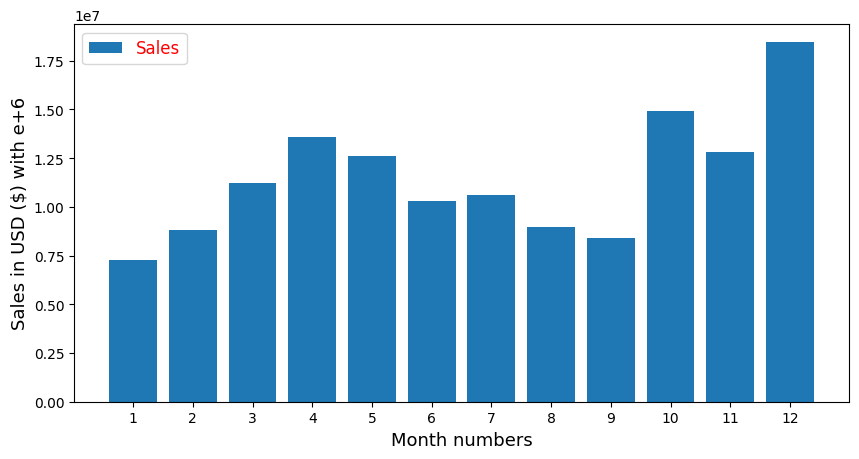

In [43]:
months = range(1, 13)
plt.figure(figsize=(10, 5), dpi=100)
plt.bar(months, results['Sales'], label='Sales')
plt.xticks(months)
plt.xlabel('Month numbers', fontsize=13)
plt.ylabel('Sales in USD ($) with e+6', fontsize=13)
plt.legend(fontsize='large', labelcolor='r')
plt.show()

#### Question 2: What city had the highest number of sales

In [73]:
results = all_data.groupby(['City']).sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),66408,1.111963e+07,419176,1.118199e+07
Austin (TX),44612,7.239494e+06,279316,7.278327e+06
Boston (MA),90112,1.454964e+07,564448,1.464657e+07
Dallas (TX),66920,1.101051e+07,418480,1.107190e+07
Los Angeles (CA),133156,2.168574e+07,833300,2.181028e+07
New York City (NY),111728,1.854148e+07,702964,1.865727e+07
Portland (ME),11000,1.788757e+06,68576,1.799033e+06
Portland (OR),45212,7.442233e+06,282484,7.482929e+06
San Francisco (CA),200956,3.284585e+07,1262080,3.304882e+07


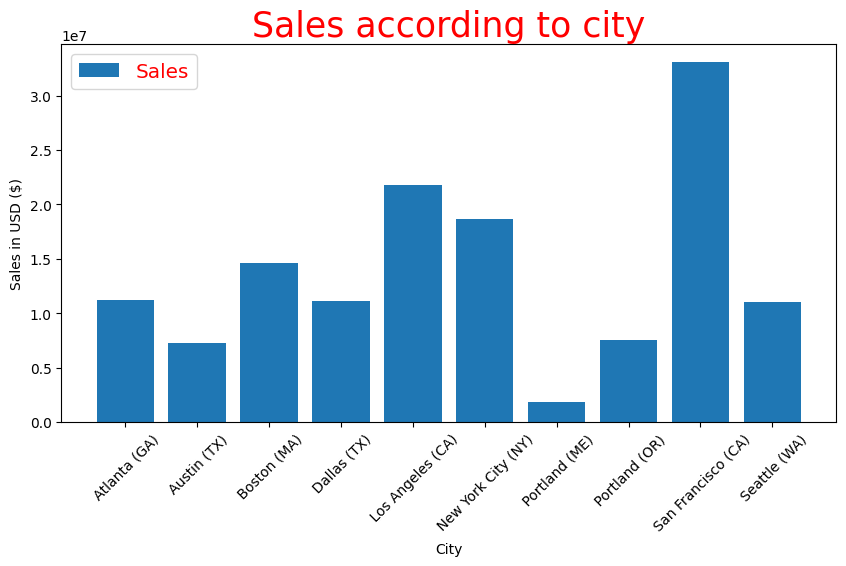

In [89]:
plt.figure(figsize=(10, 5), dpi=100)
cities = [city for city, df in all_data.groupby('City')]


plt.title('Sales according to city', fontsize=25, color='red')
plt.bar(cities, results['Sales'], label='Sales')
plt.legend(loc='upper left', fontsize='x-large', labelcolor='r')
plt.xticks(cities, rotation=45)
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [90]:
all_data['Order Date']

0           04/19/19 08:46
1         04/07/2019 22:30
2         04/12/2019 14:38
3         04/12/2019 14:38
4           04/30/19 09:27
                ...       
747402      09/17/19 20:56
747403      09/01/19 16:00
747404      09/23/19 07:39
747405      09/19/19 17:30
747406      09/30/19 00:18
Name: Order Date, Length: 743800, dtype: object